In [ ]:
import pandas as pd
csv_path ="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
dataset = pd.read_csv(csv_path, sep=",", header=None)
dataset.head(5)
#observamos que no hay nombres de columnas, por lo que los asignamos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Colocando encabezado

In [53]:
# crear un dataframe con los nombres de las columnas
headers = ["edad","clase laboral","fnlwgt","educación","núm. de educación", "estado civil", "ocupación",
           "relación", "raza", "sexo", "ganancia de capital", "pérdida de capital", "horas semanales", "país de origen", "marcas"]
dataset.columns = headers   # asignar los nombres de las columnas al dataframe
dataset.head()

,edad,clase laboral,fnlwgt,educación,núm. de educación,estado civil,ocupación,relación,raza,sexo,ganancia de capital,pérdida de capital,horas semanales,país de origen,marcas
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# shape

In [33]:
# "shape" nos da el número de filas y columnas del dataset
dataset.shape 

(32561, 15)

# describe 

In [34]:
# "describe" nos da estadísticas básicas de las columnas numéricas
dataset.describe()

,edad,fnlwgt,núm. de educación,ganancia de capital,pérdida de capital,horas semanales
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
dataset.describe(include="object") # estadísticas básicas de las columnas categóricas

,clase laboral,educación,estado civil,ocupación,relación,raza,sexo,país de origen,marcas
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# value_counts

In [38]:
educacion_counts = dataset["educación"].value_counts() # contar la cantidad de ocurrencias de cada valor en la columna "educación"
educacion_counts

educación
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

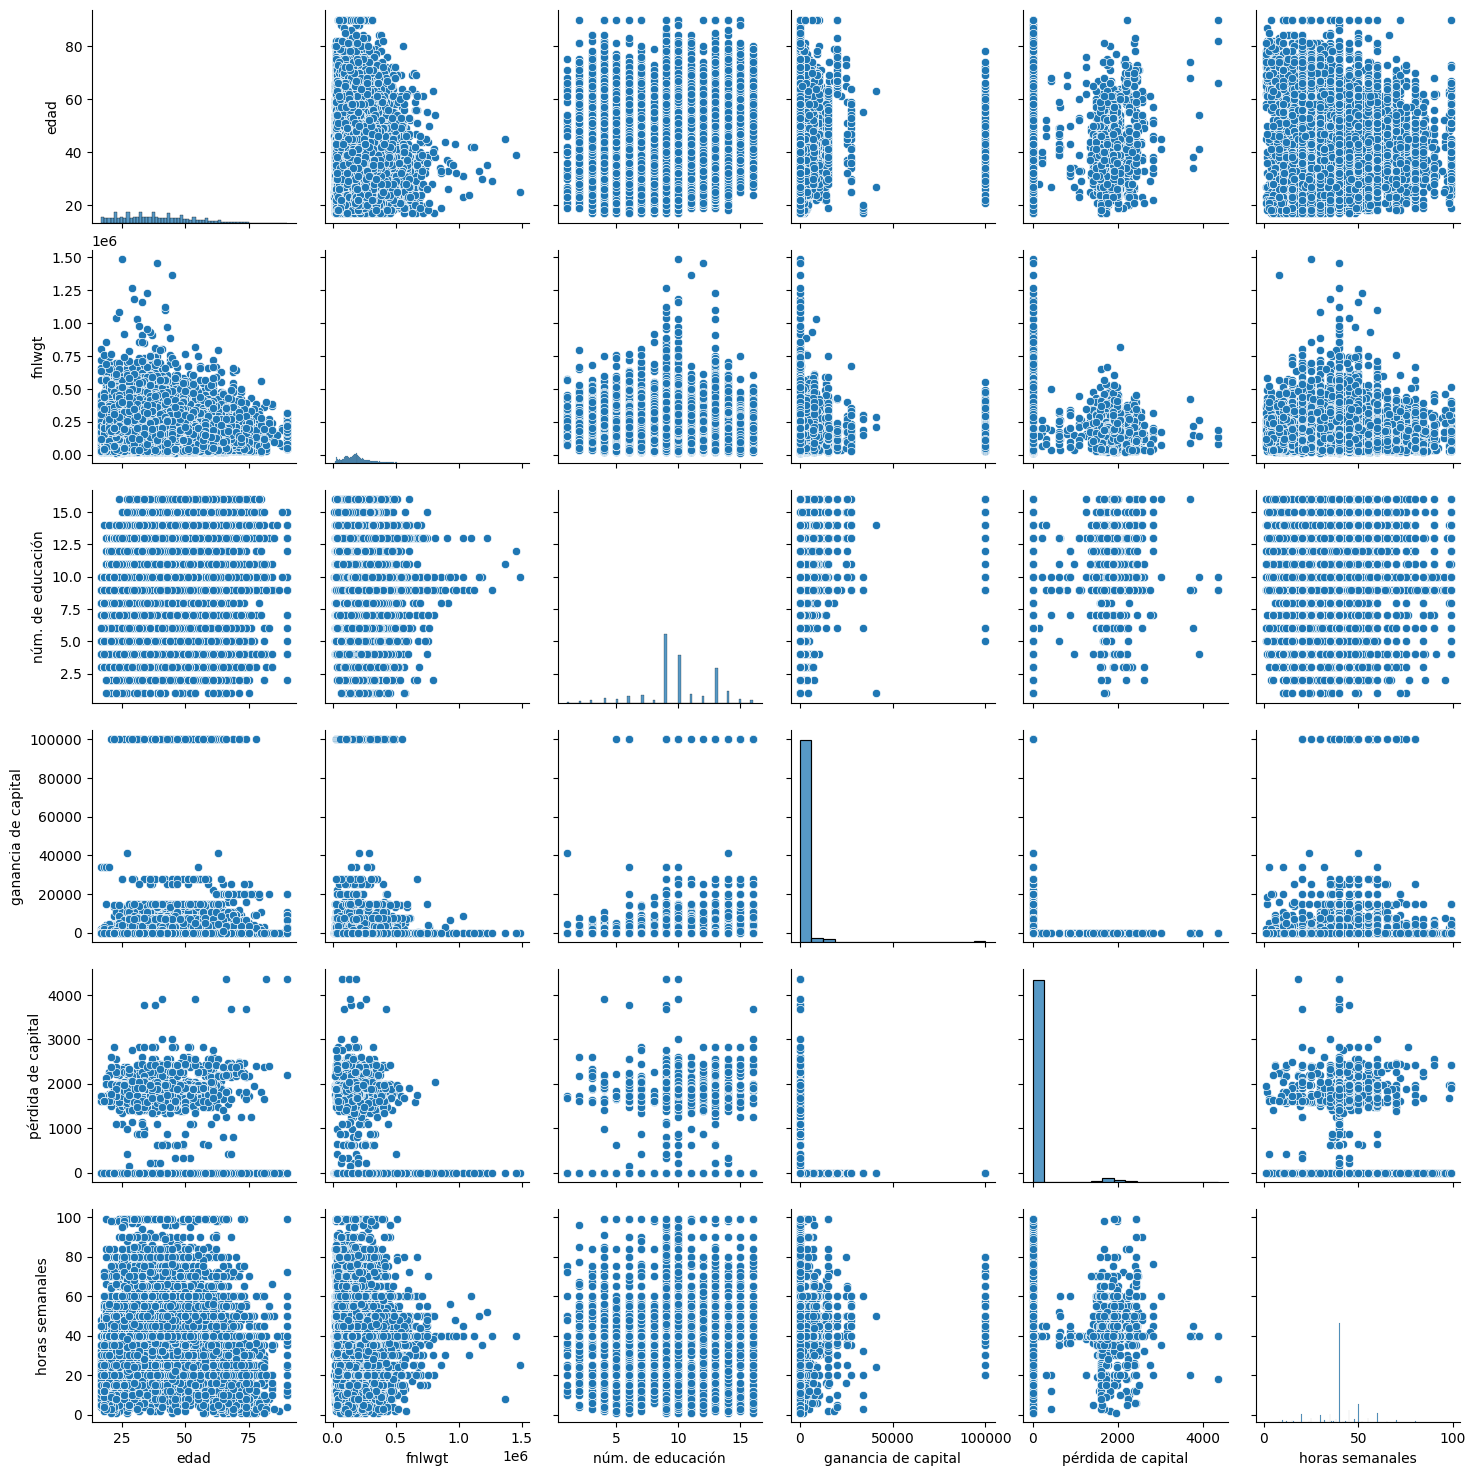

In [40]:
sns.pairplot(dataset)

<Axes: xlabel='horas semanales', ylabel='ganancia de capital'>

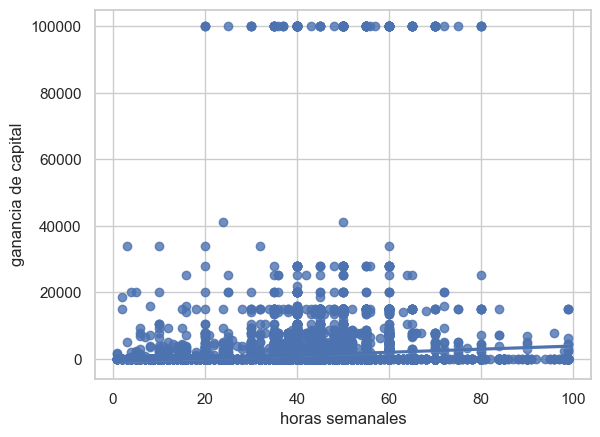

In [43]:
sns.set(style="whitegrid")
sns.regplot(x="horas semanales", y="ganancia de capital", data=dataset)

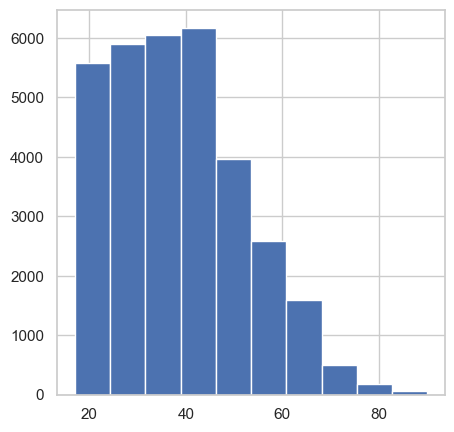

In [51]:
dataset["edad"].hist(figsize=(5, 5))    #histograma de la edad, con tamaño 6x6
plt.show()

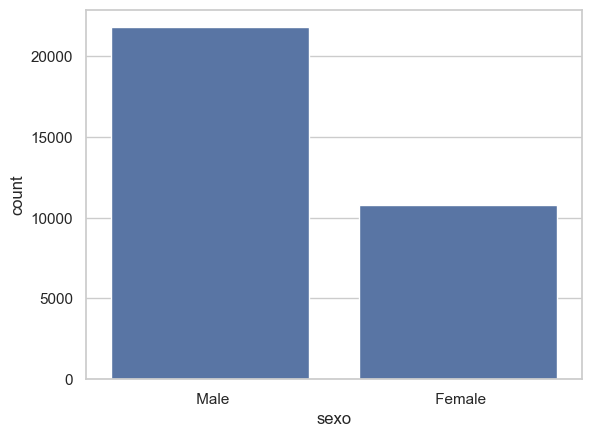

In [55]:
sns.countplot(x="sexo", data=dataset)  # gráfico de barras de la columna "sexo"
plt.show()

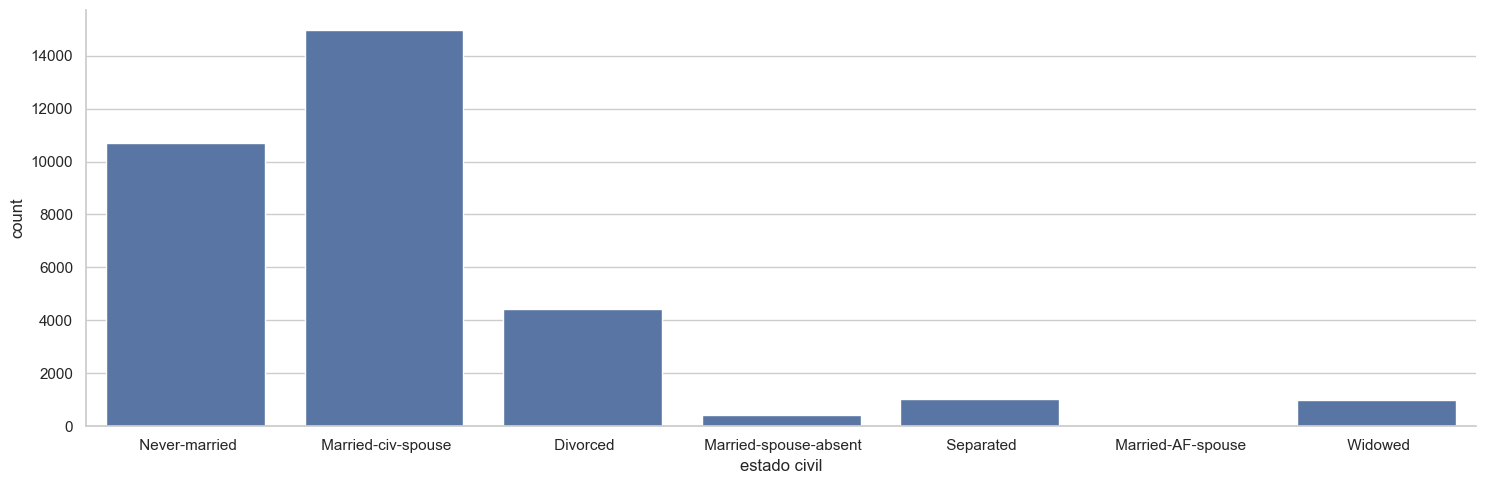

In [62]:
sns.catplot(x="estado civil", kind="count", data=dataset, height=5, aspect=3)  # gráfico de barras de la columna "estado civil"
plt.show()

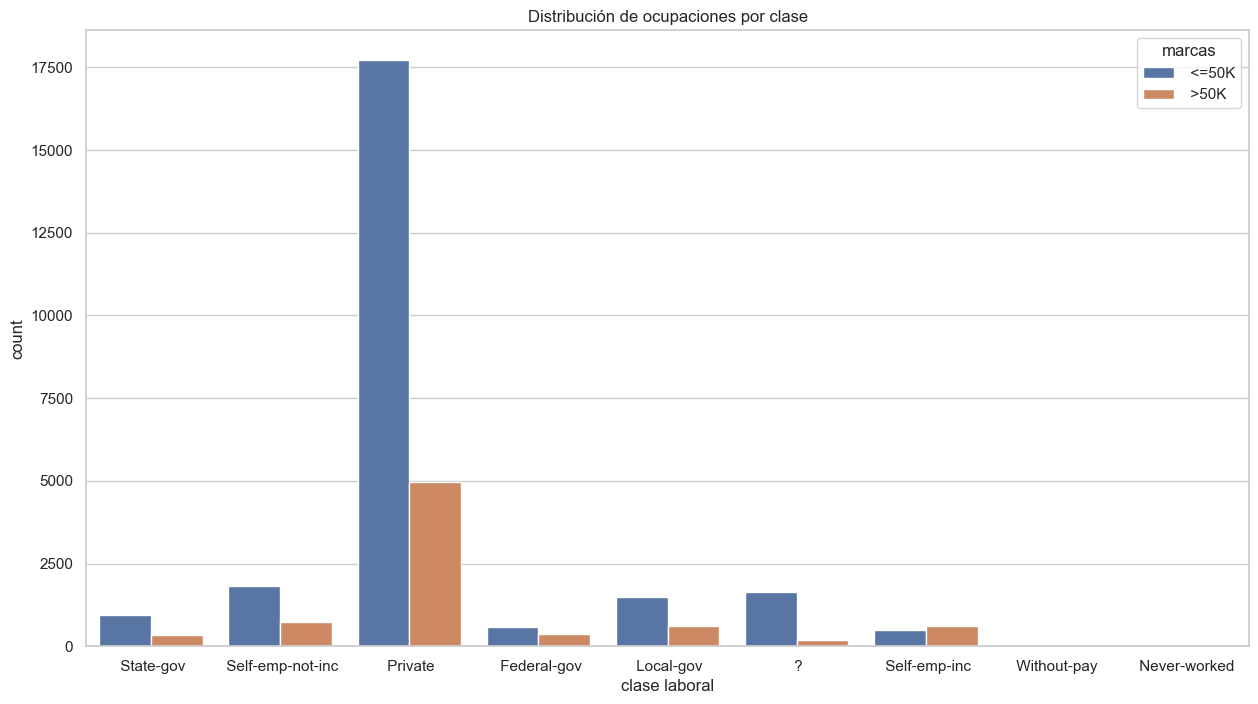

In [71]:
fig = plt.figure(figsize=(15, 8))  # crear una figura de tamaño 15x8
sns.countplot(x="clase laboral", hue="marcas", data=dataset).set_title("Distribución de ocupaciones por clase")  # título del gráfico
plt.show()  # mostrar el gráfico

# *****************************************************************

In [73]:
dataset2 = pd.read_csv("mantenimiento.csv")
dataset2

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [81]:
dataset2.dtypes  # tipos de datos de las columnas del dataframe

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

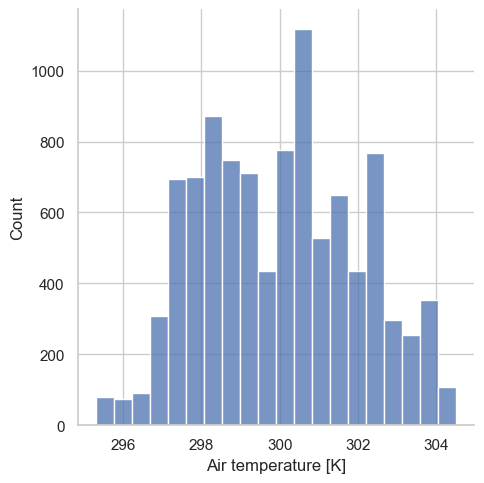

In [86]:
sns.displot(dataset2["Air temperature [K]"], bins=20)  # distribución de la temperatura del aire
plt.show()

In [90]:
median = dataset2["Air temperature [K]"].median()  # calcular la mediana de la temperatura del aire
moda = dataset2["Air temperature [K]"].mode()  # calcular la moda de la temperatura del aire
skew = dataset2["Air temperature [K]"].skew()  # calcular la asimetría de la temperatura del aire
kurt = dataset2["Air temperature [K]"].kurt()  # calcular la curtosis de la temperatura del aire
print(f"La Mediana: {median}")  # imprimir la mediana
print(f"La Moda es: {moda}")  # imprimir la moda
print(f"El sesgo es: {skew}")  # imprimir la asimetría
print(f"La Curtosis: {kurt}")  # imprimir la curtosis
# Imprimir los valores únicos de la columna "Air temperature [K]"

La Mediana: 300.1
La Moda es: 0    300.7
Name: Air temperature [K], dtype: float64
El sesgo es: 0.11427392052155042
La Curtosis: -0.8359616725774668


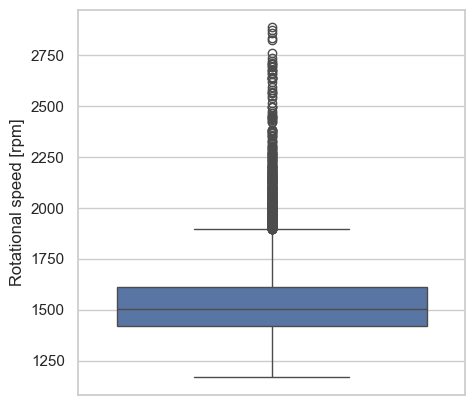

In [93]:
fig = plt.figure(figsize=(5, 5))  # crear una figura de tamaño 10x10
sns.boxplot(y = dataset2["Rotational speed [rpm]"])  # gráfico de caja de la temperatura del aire
plt.show()  # mostrar el gráfico

In [94]:
print(dataset2.isnull().sum())  # contar los valores nulos en cada columna del dataframe

UDI                            0
Product ID                 10000
Type                           0
Air temperature [K]            0
Process temperature [K]        0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Machine failure                0
TWF                            0
HDF                            0
PWF                            0
OSF                            0
RNF                            0
dtype: int64
